In [1]:
%matplotlib inline
import requests
import pandas as pd
from config import ykey
import json
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [2]:
#loaded in all of the .csv files saved from the api requests.

#Each dataframe was checked individually to make sure '.columns.map(lambda x: x.split(".")[-1])' dropped the first word of each column containing a period

#Made sure each dataframe had the same number of columns

italian_sf_df = pd.read_csv('italian_food_san_francisco.csv')
mexican_sf_df = pd.read_csv('mexican_food_san_francisco.csv')
mexican_sf_df

,Unnamed: 0,id,alias,name,image_url,is_closed,url,review_count,categories,rating,...,coordinates.latitude,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address
0,0,Oz7Uch-u5Qf7i5BlriLhTg,caliente-bistro-kitchen-san-francisco,Caliente Bistro Kitchen,https://s3-media2.fl.yelpcdn.com/bphoto/LhH9mE...,False,https://www.yelp.com/biz/caliente-bistro-kitch...,63,"[{'alias': 'mexican', 'title': 'Mexican'}]",5.0,...,37.781010,-122.471260,4828 Geary Blvd,NaN,NaN,San Francisco,94118,US,CA,"['4828 Geary Blvd', 'San Francisco, CA 94118']"
1,1,SGRmnarrNuVEsAjYdEoA0w,el-farolito-san-francisco-2,El Farolito,https://s3-media2.fl.yelpcdn.com/bphoto/kYemXi...,False,https://www.yelp.com/biz/el-farolito-san-franc...,5078,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.0,...,37.752650,-122.418120,2779 Mission St,NaN,NaN,San Francisco,94110,US,CA,"['2779 Mission St', 'San Francisco, CA 94110']"
2,2,_EncdQezAzcShATMFXL0dA,tropisueño-san-francisco-10,Tropisueño,https://s3-media3.fl.yelpcdn.com/bphoto/Eghg_0...,False,https://www.yelp.com/biz/tropisue%C3%B1o-san-f...,4549,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.0,...,37.785301,-122.403919,75 Yerba Buena Ln,NaN,NaN,San Francisco,94103,US,CA,"['75 Yerba Buena Ln', 'San Francisco, CA 94103']"
3,3,cx6y2D1Q77R6dEqMOvnL7g,underdogs-tres-san-francisco,Underdogs Tres,https://s3-media3.fl.yelpcdn.com/bphoto/rOZ6dG...,False,https://www.yelp.com/biz/underdogs-tres-san-fr...,2000,"[{'alias': 'sportsbars', 'title': 'Sports Bars...",4.0,...,37.765434,-122.466296,1224 9th Ave,NaN,NaN,San Francisco,94122,US,CA,"['1224 9th Ave', 'San Francisco, CA 94122']"
4,4,BiTX6BWh3u24HwcrsipI8w,taqueria-los-mayas-san-francisco,Taqueria Los Mayas,https://s3-media2.fl.yelpcdn.com/bphoto/FubroV...,False,https://www.yelp.com/biz/taqueria-los-mayas-sa...,431,"[{'alias': 'tacos', 'title': 'Tacos'}, {'alias...",4.0,...,37.782827,-122.462884,331 Clement St,NaN,NaN,San Francisco,94118,US,CA,"['331 Clement St', 'San Francisco, CA 94118']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,gVwKmTITJjqh-L193vvI_w,royal-egyptian-cuisine-berkeley,Royal Egyptian Cuisine,https://s3-media2.fl.yelpcdn.com/bphoto/o5re4F...,False,https://www.yelp.com/biz/royal-egyptian-cuisin...,231,"[{'alias': 'foodtrucks', 'title': 'Food Trucks...",4.5,...,37.869057,-122.270462,NaN,NaN,NaN,Berkeley,94607,US,CA,"['Berkeley, CA 94607']"
996,996,29ys00My-dBVpBDIO58ifw,bell-tower-san-francisco,Bell Tower,https://s3-media2.fl.yelpcdn.com/bphoto/vcv-cL...,False,https://www.yelp.com/biz/bell-tower-san-franci...,635,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",3.5,...,37.794330,-122.421240,1900 Polk St,NaN,NaN,San Francisco,94109,US,CA,"['1900 Polk St', 'San Francisco, CA 94109']"
997,997,SDqcbwxGiYTwfe-xHVZdvw,el-caballo-wraps-alameda-2,El Caballo Wraps,https://s3-media4.fl.yelpcdn.com/bphoto/xp_DVQ...,False,https://www.yelp.com/biz/el-caballo-wraps-alam...,365,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.0,...,37.774544,-122.265259,1108 Lincoln Ave,NaN,NaN,Alameda,94501,US,CA,"['1108 Lincoln Ave', 'Alameda, CA 94501']"
998,998,fCXRcQ7avAaqlaTvgWMpAQ,il-casaro-pizzeria-and-mozzarella-bar-castro-s...,Il Casaro Pizzeria & Mozzarella Bar - Castro,https://s3-media1.fl.yelpcdn.com/bphoto/PGHOlm...,False,https://www.yelp.com/biz/il-casaro-pizzeria-an...,167,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.0,...,37.766951,-122.428641,235 Church St,NaN,NaN,San Francisco,94114,US,CA,"['235 Church St', 'San Francisco, CA 94114']"


In [3]:
italian_sf_df = italian_sf_df[['city','state','name','address1','review_count','rating']]
italian_sf_df

,city,state,name,address1,review_count,rating
0,San Francisco,CA,Bella Trattoria,3854 Geary Blvd,1540,4.5
1,San Francisco,CA,Sotto Mare Oysteria & Seafood,552 Green St,4171,4.5
2,San Francisco,CA,Beretta,1199 Valencia St,3844,4.0
3,San Francisco,CA,Roma Antica,3242 Scott St,906,4.5
4,San Francisco,CA,The Italian Homemade Company,1919 Union St,1049,4.5
...,...,...,...,...,...,...
995,San Francisco,CA,Wonderful Dessert & Cafe,2035 Irving St,1280,4.0
996,Berkeley,CA,Longbranch,2512 San Pablo Ave,433,4.0
997,San Francisco,CA,22nd & Irving Market,2101 Irving St,285,4.5
998,Oakland,CA,Millennium,5912 College Ave,784,4.0


In [4]:
mexican_sf_df.columns = mexican_sf_df.columns.map(lambda x: x.split(".")[-1])
mexican_sf_df = mexican_sf_df[['city','state','name','address1','review_count','rating']]
mexican_sf_df

,city,state,name,address1,review_count,rating
0,San Francisco,CA,Caliente Bistro Kitchen,4828 Geary Blvd,63,5.0
1,San Francisco,CA,El Farolito,2779 Mission St,5078,4.0
2,San Francisco,CA,Tropisueño,75 Yerba Buena Ln,4549,4.0
3,San Francisco,CA,Underdogs Tres,1224 9th Ave,2000,4.0
4,San Francisco,CA,Taqueria Los Mayas,331 Clement St,431,4.0
...,...,...,...,...,...,...
995,Berkeley,CA,Royal Egyptian Cuisine,NaN,231,4.5
996,San Francisco,CA,Bell Tower,1900 Polk St,635,3.5
997,Alameda,CA,El Caballo Wraps,1108 Lincoln Ave,365,4.0
998,San Francisco,CA,Il Casaro Pizzeria & Mozzarella Bar - Castro,235 Church St,167,4.0


In [5]:
italian_sd_df = pd.read_csv('italian_food_san_diego.csv')
mexican_sd_df = pd.read_csv('mexican_food_san_diego.csv')

In [6]:
italian_sd_df = italian_sd_df[['city','state','name','address1','review_count','rating']]

In [7]:
mexican_sd_df = mexican_sd_df[['city','state','name','address1','review_count','rating']]

In [8]:
italian_sj_df = pd.read_csv('italian_food_san_jose.csv')
mexican_sj_df = pd.read_csv('mexican_food_san_jose.csv')

In [9]:
italian_sj_df = italian_sj_df[['city','state','name','address1','review_count','rating']]

In [10]:
mexican_sj_df = mexican_sj_df[['city','state','name','address1','review_count','rating']]

In [11]:
italian_la_df = pd.read_csv('italian_food_los_angeles.csv')
mexican_la_df = pd.read_csv('mexican_food_los_angeles.csv')

In [12]:
italian_la_df = italian_la_df[['city','state','name','address1','review_count','rating']]

In [13]:
mexican_la_df = mexican_la_df[['city','state','name','address1','review_count','rating']]

In [14]:
#There was no way to differentiate between Mexican and Italian restaurants apart from my api search input,
#so the Mexican and Italian restaurant dataframes are in two separate .csv files but cannot be merged into one.

italian_california_df = pd.concat([italian_sf_df,italian_sd_df,italian_sj_df,italian_la_df])
italian_california_df = italian_california_df[['city','state','name','address1','review_count','rating']]
italian_california_df.to_csv('italian_restaurants_california.csv')
italian_california_df

,city,state,name,address1,review_count,rating
0,San Francisco,CA,Bella Trattoria,3854 Geary Blvd,1540,4.5
1,San Francisco,CA,Sotto Mare Oysteria & Seafood,552 Green St,4171,4.5
2,San Francisco,CA,Beretta,1199 Valencia St,3844,4.0
3,San Francisco,CA,Roma Antica,3242 Scott St,906,4.5
4,San Francisco,CA,The Italian Homemade Company,1919 Union St,1049,4.5
...,...,...,...,...,...,...
995,Monrovia,CA,The Saltner Wine & Cicchetti,108 E Colorado Blvd,131,4.0
996,Los Angeles,CA,Highland Park Bowl,5621 N Figueroa St,640,4.0
997,Pasadena,CA,Malbec Argentinean Cuisine,1001 E Green St,1834,4.0
998,Los Angeles,CA,5 Line Tavern,2136 Colorado Blvd,384,3.5


In [15]:
mexican_california_df = pd.concat([mexican_sf_df,mexican_sd_df,mexican_sj_df,mexican_la_df])
mexican_california_df = mexican_california_df[['city','state','name','address1','review_count','rating']]
mexican_california_df.to_csv('mexican_restaurants_california.csv')
mexican_california_df

,city,state,name,address1,review_count,rating
0,San Francisco,CA,Caliente Bistro Kitchen,4828 Geary Blvd,63,5.0
1,San Francisco,CA,El Farolito,2779 Mission St,5078,4.0
2,San Francisco,CA,Tropisueño,75 Yerba Buena Ln,4549,4.0
3,San Francisco,CA,Underdogs Tres,1224 9th Ave,2000,4.0
4,San Francisco,CA,Taqueria Los Mayas,331 Clement St,431,4.0
...,...,...,...,...,...,...
995,Los Angeles,CA,San Salvador Restaurant,1828 S Vermont Ave,27,2.5
996,Los Angeles,CA,El Amanecer Restaurant,3040 W Sunset Blvd,1,5.0
997,Cypress,CA,El Zarape,4197 Ball Rd,678,4.0
998,Vernon,CA,Margarita's Tacos & Grill,2538 S Alameda St,17,4.5


In [16]:
#Defined functions for the graphs, using .squeeze() to convert .loc dataframe into a series that could be read by the graph

#Could have condensed the functions down into 1 line but it was hard to keep track of

def italian_ratings(city_name): return italian_california_df.loc[(italian_california_df['city'] == city_name),['rating']].squeeze()
    
def mexican_ratings(city_name): return mexican_california_df.loc[(mexican_california_df['city'] == city_name),['rating']].squeeze()

In [18]:
def italian_average_ratings(city): 
    italian_average_rating = italian_california_df.groupby(['city']).mean()['rating']
    
    return italian_average_rating[city]

def mexican_average_ratings(city): 
    mexican_average_rating = mexican_california_df.groupby(['city']).mean()['rating']
    
    return mexican_average_rating[city]

In [19]:
def italian_restaurants(city):
    italian_total_rating = italian_california_df.groupby(['city']).count()['name']
    
    return italian_total_rating[city]

def mexican_restaurants(city):
    mexican_total_rating = mexican_california_df.groupby(['city']).count()['name']
    
    return mexican_total_rating[city]

In [28]:
#Mean Rating by city

cali_italian_gb_mr = italian_california_df.groupby(['city']).mean()['rating']
cali_mexican_gb_mr = mexican_california_df.groupby(['city']).mean()['rating']

#Total Restaurants by city
cali_italian_gb_tr = italian_california_df.groupby(['city']).count()['name']
cali_mexican_gb_tr = mexican_california_df.groupby(['city']).count()['name']

state
BCN    4.139344
CA     3.933469
LA     2.000000
Name: rating, dtype: float64

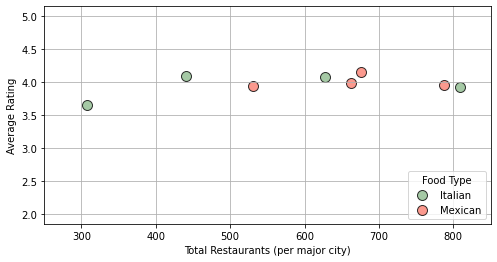

In [26]:
#Scatter for Italian food in major California Cities

plt.subplots(figsize=(8,4))
plt.scatter(cali_italian_gb_tr,cali_italian_gb_mr, color = 'darkseagreen',edgecolor = 'black',
           linewidth = 1,alpha = .8,
           marker = 'o',s = 100,label = 'Italian')

#Scatter for Mexican food in major California cities
plt.scatter(cali_mexican_gb_tr,cali_mexican_gb_mr, color = 'salmon',edgecolor = 'black',
           linewidth = 1,alpha = .8,
           marker = 'o',s = 100,label = 'Mexican')

lgnd = plt.legend(fontsize='10',mode='Expanded',
                 scatterpoints=1,loc='lower right',title='Food Type')
plt.yticks(np.arange(2,5.5,step=0.5))
plt.xlim(250,850)
plt.ylabel('Average Rating')
plt.xlabel('Total Restaurants (per major city)')
plt.grid()
plt.show()

In [23]:
def print_notes(city): return city + " has at least " + str(italian_restaurants(city)) + " italian restaurants with an average rating " + str(italian_average_ratings(city)) + "\n They have at least " + str(mexican_restaurants(city)) + " Mexican restaurants with an average rating " + str(mexican_average_ratings(city)) +" \n\n=====\n\n"

print('Note for figure above: \n\n',
      print_notes('San Jose'),
      print_notes('Los Angeles'),
      print_notes('San Diego'),
      print_notes('San Francisco'),
     ('**City limits only, neighborhoods are not included'))

Note for figure above: 

 San Jose has at least 307 italian restaurants with an average rating 3.6547231270358305
 They have at least 530 Mexican restaurants with an average rating 3.9367924528301885 

=====

 Los Angeles has at least 441 italian restaurants with an average rating 4.09297052154195
 They have at least 676 Mexican restaurants with an average rating 4.147189349112426 

=====

 San Diego has at least 628 italian restaurants with an average rating 4.0756369426751595
 They have at least 663 Mexican restaurants with an average rating 3.9894419306184012 

=====

 San Francisco has at least 809 italian restaurants with an average rating 3.930778739184178
 They have at least 787 Mexican restaurants with an average rating 3.955527318932656 

=====

 **City limits only, neighborhoods are not included


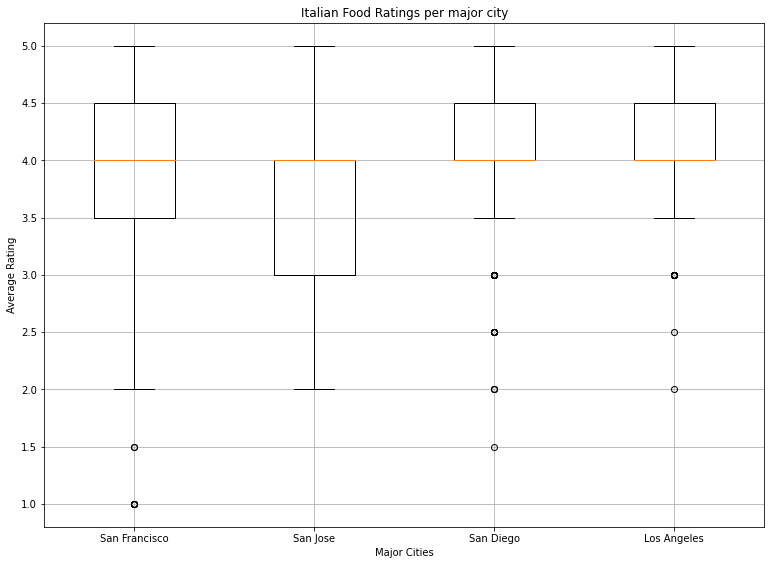

In [24]:
#Major City Food Boxplot
x_labels = ['San Francisco','San Jose','San Diego','Los Angeles']

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0,0,1,1])
ax.set_yticks(np.arange(0,5.5,step=.5))
average_rating = [italian_ratings('San Francisco'),
                  italian_ratings('San Jose'),
                  italian_ratings('San Diego'),
                  italian_ratings('Los Angeles')]
ax.boxplot(average_rating, labels = x_labels)
ax.set_xlabel('Major Cities')
ax.set_ylabel('Average Rating')
ax.set_yticks(np.arange(1.0,5.5,step=0.5))
ax.set_title('Italian Food Ratings per major city')
ax.grid()

plt.show()

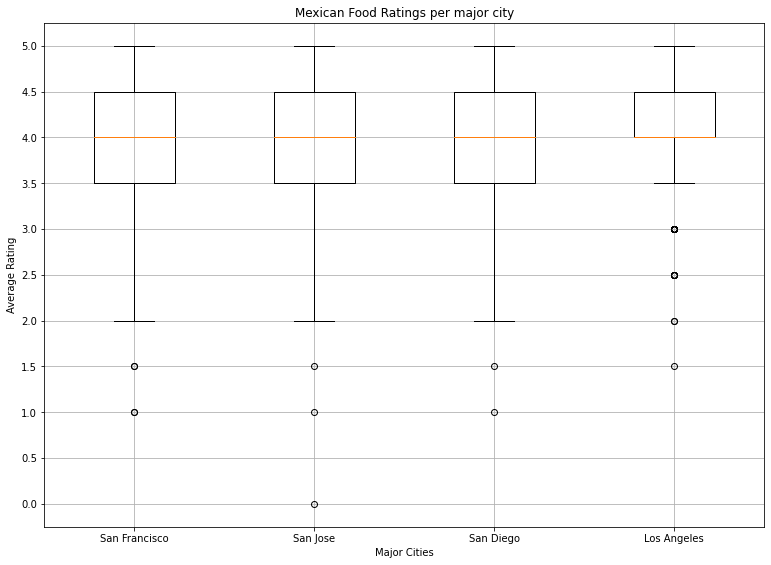

In [25]:
#Major City Food Boxplot
x_labels = ['San Francisco','San Jose','San Diego','Los Angeles']

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0,0,1,1])
average_rating = [mexican_ratings('San Francisco'),
                  mexican_ratings('San Jose'),
                  mexican_ratings('San Diego'),
                  mexican_ratings('Los Angeles')]
ax.boxplot(average_rating, labels = x_labels)
ax.set_xlabel('Major Cities')
ax.set_ylabel('Average Rating')
ax.set_yticks(np.arange(0,5.5,step=.5))
ax.set_title('Mexican Food Ratings per major city')
plt.grid()

plt.show()